In [5]:
import matplotlib.pyplot as plt
import nest
import numpy as np

nest.ResetKernel()  # in case we run the script multiple times from iPython

In [6]:
nest.resolution = 0.01

num_nodes = 3
g = nest.Create(
    "sinusoidal_poisson_generator",
    n=num_nodes,
    params={"rate": 125, "amplitude": [0,125,325], "frequency": 100},
)

m = nest.Create("multimeter", num_nodes, {"interval": 0.1, "record_from": ["rate"]})
s = nest.Create("spike_recorder", num_nodes)

nest.Connect(m, g, "one_to_one")
nest.Connect(g, s, "one_to_one")
print(m.get())
nest.Simulate(100)


Oct 27 09:44:33 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.01 ms.
{'element_type': ('recorder', 'recorder', 'recorder'), 'events': ({'senders': array([], dtype=int64), 'times': array([], dtype=float64)}, {'senders': array([], dtype=int64), 'times': array([], dtype=float64)}, {'senders': array([], dtype=int64), 'times': array([], dtype=float64)}), 'frozen': (False, False, False), 'global_id': (4, 5, 6), 'interval': (0.1, 0.1, 0.1), 'label': ('', '', ''), 'local': (True, True, True), 'model': ('multimeter', 'multimeter', 'multimeter'), 'model_id': (59, 59, 59), 'n_events': (0, 0, 0), 'node_uses_wfr': (False, False, False), 'offset': (0.0, 0.0, 0.0), 'origin': (0.0, 0.0, 0.0), 'record_from': (('rate',), ('rate',), ('rate',)), 'record_to': ('memory', 'memory', 'memory'), 'start': (0.0, 0.0, 0.0), 'stop': (1.7976931348623157e+308, 1.7976931348623157e+308, 1.7976931348623157e+308), 'thread': (0, 0, 0), 'thread_local_id': (-1, -1, -1), 'time_in_steps

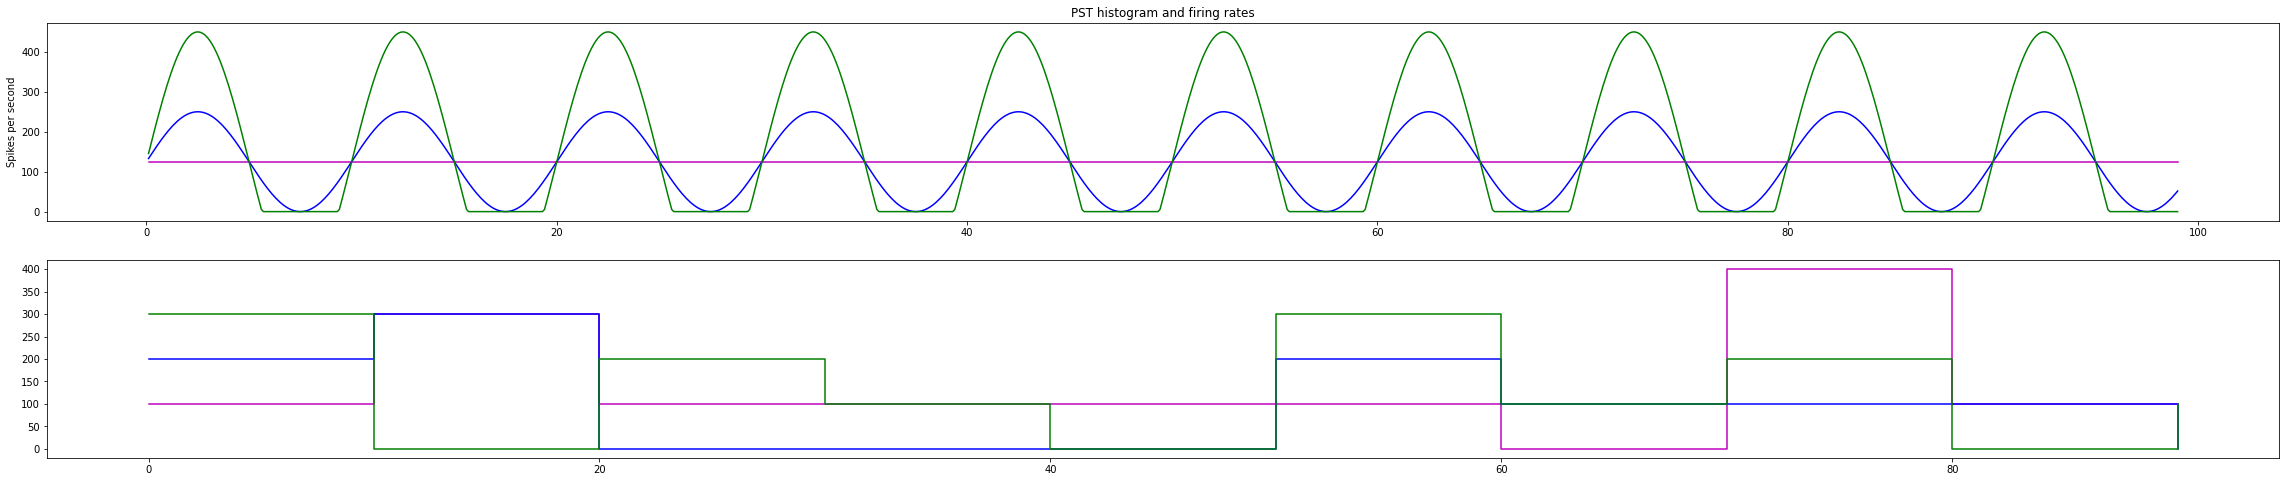

In [11]:
colors = ["m", "b", "g"]
fig, ax = plt.subplots(2,figsize = (40,8))
bin_dim = 10
for j in range(num_nodes):
    ev = m[j].events
    t = ev["times"]
    r = ev["rate"]
    ax[0].plot(t, r, color=colors[j])
    
    ax[0].set_title("PST histogram and firing rates")
    ax[0].set_ylabel("Spikes per second")
    
    spike_times = s[j].events["times"]
    h, e = np.histogram(spike_times, bins=np.arange(0.0, 101.0, bin_dim))
    ax[1].step(e[:-1], h * 1000/bin_dim, color=colors[j], where="post")